In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import csv

# Importación de datos de fuentes de turismo

## Average Daily Rates nacionales

In [3]:
nacional = pd.read_csv('../datos/Average_daily_rate.csv', sep=";", encoding='latin-1')

nacional['Total'] = nacional['Total'].replace(',','.', regex=True)
nacional['Total'] = pd.to_numeric(nacional['Total'],errors='coerce')
nacional['Total'] = nacional['Total'].fillna(0.0)
nacional['year'] = nacional.apply(lambda row: row['Periodo'].split('M')[0], axis=1)
nacional['month'] = nacional.apply(lambda row: row['Periodo'].split('M')[1], axis=1)
nacional['Date'] = nacional.apply(lambda row: datetime.datetime(int(row['year']), int(row['month']), 1), axis=1)
nacional['ADR'] = nacional['Total']
nacional = nacional[['Date', 'ADR']]

## Revenue Per Available Room nacionales

In [9]:
more=pd.read_csv('../datos/RevPar.csv', sep=";",encoding='latin-1')
more.head()

more['Total'] = more['Total'].replace(',','.', regex=True)
more['Total'] = pd.to_numeric(more['Total'],errors='coerce')
more['Total'] = more['Total'].fillna(0.0)
more['year'] = more.apply(lambda row: row['Periodo'].split('M')[0], axis=1)
more['month'] = more.apply(lambda row: row['Periodo'].split('M')[1], axis=1)
more['Date'] = more.apply(lambda row: datetime.datetime(int(row['year']), int(row['month']), 1), axis=1)
more['RevPAR'] = more['Total']
more = more[['Date', 'RevPAR']]

nacional = nacional.merge(more)

nacional = nacional.sort_values(by='Date', ascending=True)
nacional = nacional.reset_index(drop=True)

## Average Stay por zonas turísticas

In [5]:
zonas=pd.read_csv('../datos/Average_stay.csv',sep=";")
zonas.head()

zonas['Total'] = zonas['Total'].replace(',','.', regex=True)
zonas['Total'] = pd.to_numeric(zonas['Total'],errors='coerce')
zonas['Total'] = zonas['Total'].fillna(0.0)
zonas['year'] = zonas.apply(lambda row: row['Periodo'].split('M')[0], axis=1)
zonas['month'] = zonas.apply(lambda row: row['Periodo'].split('M')[1], axis=1)
zonas['Date'] = zonas.apply(lambda row: datetime.datetime(int(row['year']), int(row['month']), 1), axis=1)
zonas['Zona'] = zonas["Zonas  Turísticas"]
zonas['AvgStay'] = zonas['Total']
zonas=zonas[["Zona","Date", "AvgStay"]]

fecha_inicio = datetime.datetime(2019,1,1)
zonas = zonas[zonas["Date"]>=fecha_inicio]

## Estimated Beds por zonas turísticas

In [8]:
zonas2=pd.read_csv('../datos/Estimated_bed_places.csv',sep=";")

zonas2 = zonas2[zonas2["Apartamentos y personal empleado"]=="Número de plazas estimadas"]
zonas2['Total'] = zonas2['Total'].replace('\.','', regex=True).replace(',','.', regex=True)

zonas2['Total'] = pd.to_numeric(zonas2['Total'],errors='coerce')
zonas2['Total'] = zonas2['Total'].fillna(0.0)
zonas2['year'] = zonas2.apply(lambda row: row['Periodo'].split('M')[0], axis=1)
zonas2['month'] = zonas2.apply(lambda row: row['Periodo'].split('M')[1], axis=1)
zonas2['Date'] = zonas2.apply(lambda row: datetime.datetime(int(row['year']), int(row['month']), 1), axis=1)
zonas2['Zona'] = zonas2["Zonas  Turísticas"]
zonas2['EstBeds'] = zonas2['Total']
zonas2=zonas2[["Date", "Zona", "EstBeds"]]

zonas2 = zonas2[zonas2["Date"]>=fecha_inicio]

zonas = zonas.merge(zonas2)


Ahora tenemos dos DataFrames con las estadísticas nacionales y por zonas turísticas:

In [6]:
nacional.head()

,Date,ADR,RevPAR
0,2019-01-01,81.37,43.30
1,2019-02-01,84.20,49.49
2,2019-03-01,81.34,50.38
3,2019-04-01,83.73,53.78
4,2019-05-01,83.50,54.97


In [36]:
zonas.head()

,Zona,Date,AvgStay,EstBeds
0,Pirineo Navarro,2019-01-01,0.00,0.00
1,Murcia (Región De): Costa Cálida,2019-01-01,10.49,1442.00
2,Canarias: Isla De Lanzarote,2019-01-01,9.07,83.35
3,Canarias: Isla De Lanzarote,2019-01-01,9.07,84.09
4,Canarias: Isla De Lanzarote,2019-01-01,9.07,2554.00


# Visualización de datos básicos

## KPIs nacionales

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

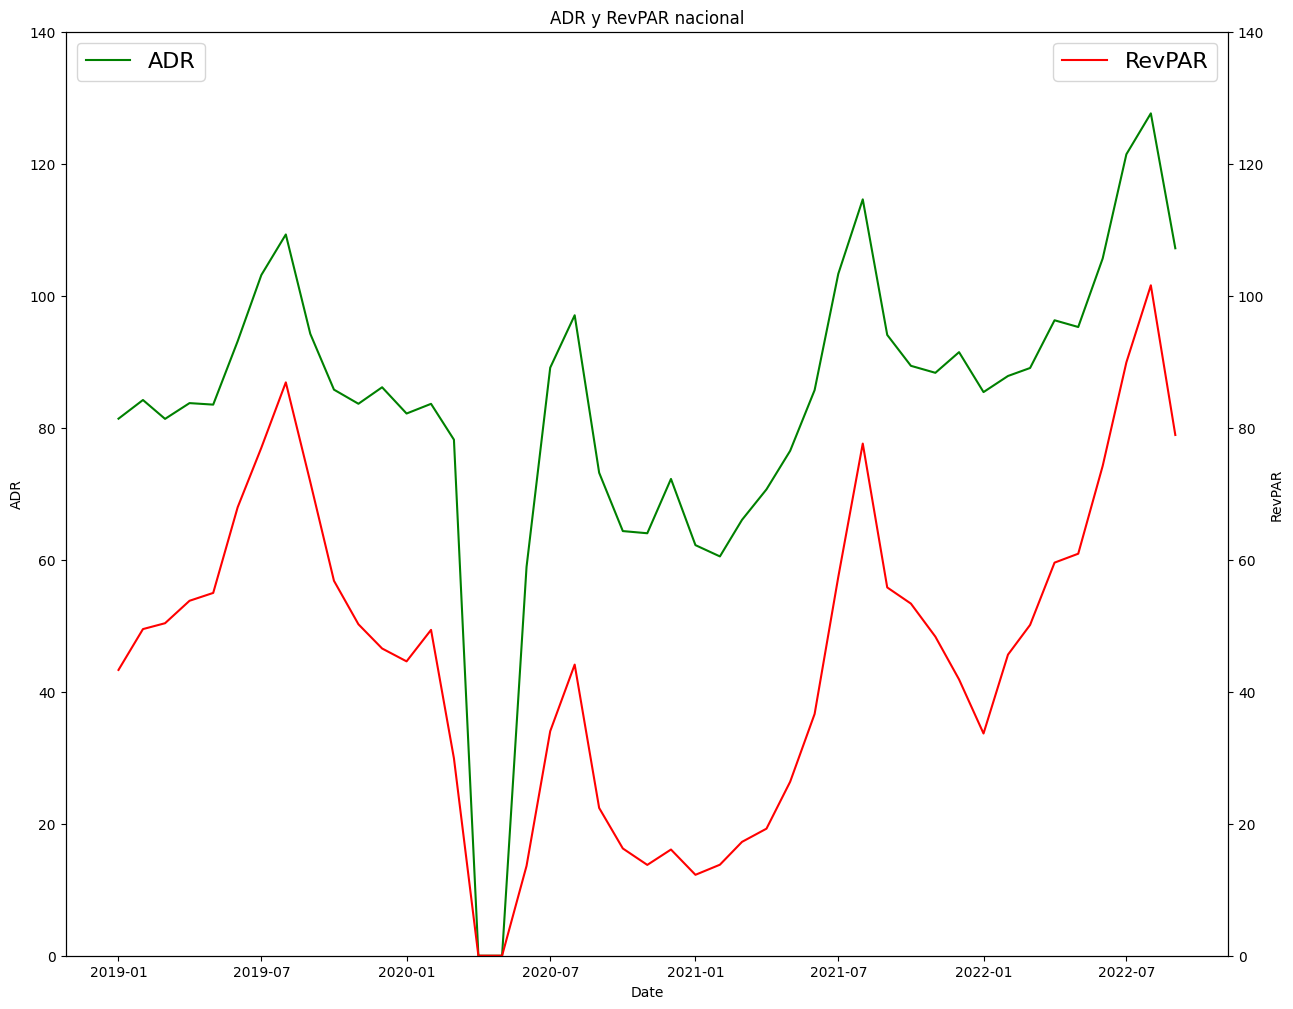

In [61]:
plt.figure(figsize=(15,12))
plt.ylim(0,140)
plt.title("ADR y RevPAR nacional")


ADR=sns.lineplot(x=nacional["Date"], y=nacional["ADR"], color='g')
plt.legend(labels=["ADR"], loc="upper left")


ax2 = plt.twinx()
plt.ylim(0,140)
RevPAR=sns.lineplot(x=nacional["Date"], y=nacional["RevPAR"], color="r", ax=ax2)
plt.legend(labels=["RevPAR"], loc="upper right")


Observaciones:
- Se ve que los precios medios diarios han subido después del covid (línea verde).
- De la misma manera, las estancias son más rentables pues el beneficio por habitación disponible después del covid es más alto (línea roja).
- Conclusión: El turismo se ha vuelto más caro desde que tuvimos covid.

## KPIs nacionales con medias móviles

In [63]:
nacional['ADR_movingAVG'] = nacional['ADR'].rolling(5).mean()
nacional['ADR_movingAVG'].fillna(value=nacional['ADR'], inplace=True)

nacional['RevPAR_movingAVG'] = nacional['RevPAR'].rolling(5).mean()
nacional['RevPAR_movingAVG'].fillna(value=nacional['RevPAR'], inplace=True)

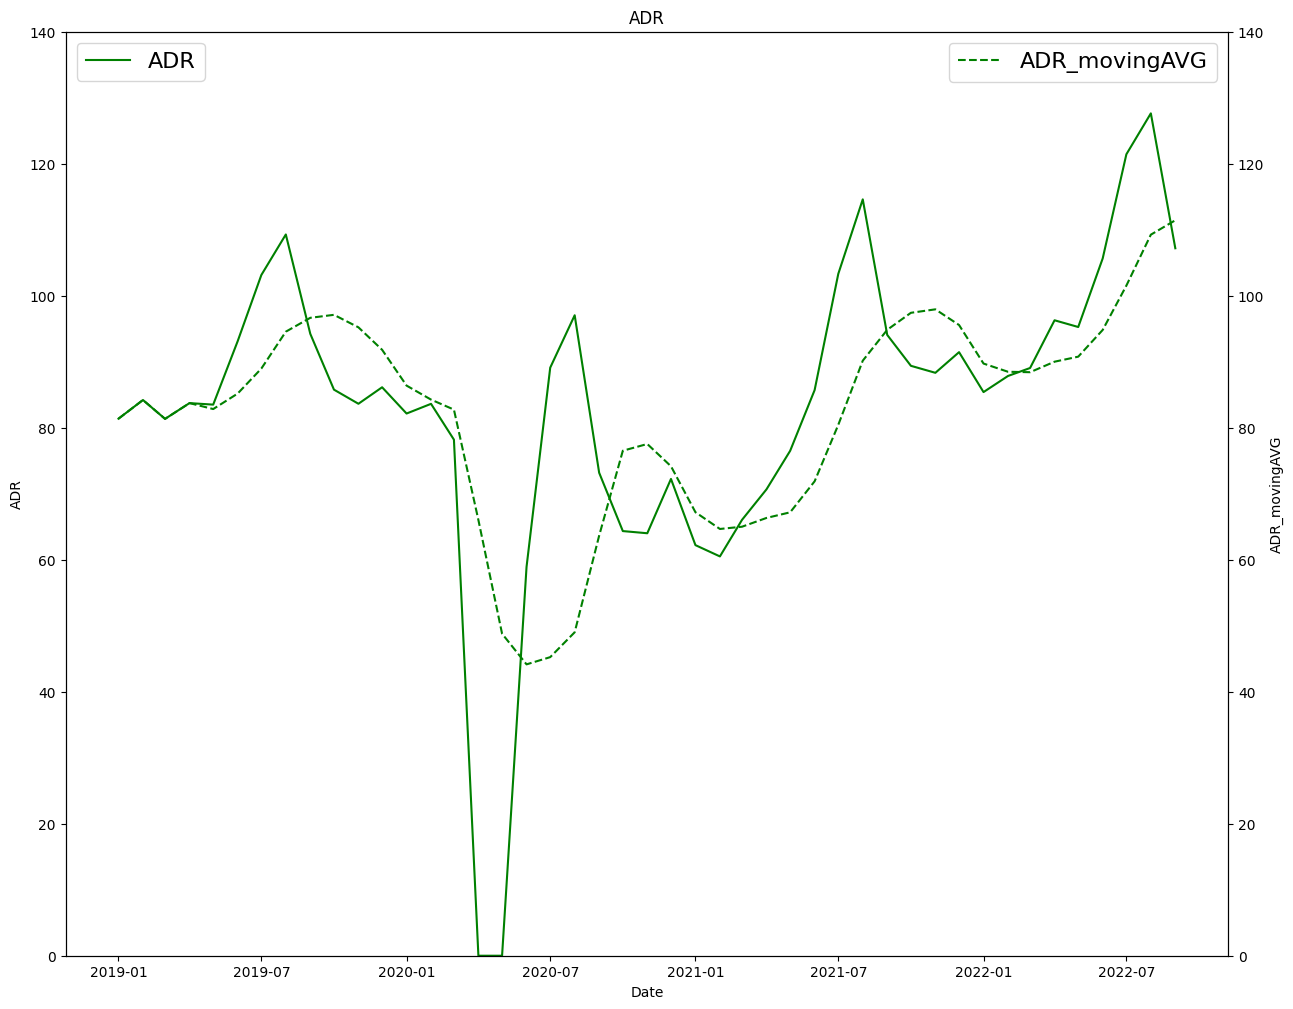

In [64]:
plt.figure(figsize=(15,12))
plt.title("ADR")
plt.ylim(0,140)

sns.lineplot(x=nacional["Date"], y=nacional["ADR"], color='g')
plt.legend(labels=["ADR"], loc="upper left")

ax2 = plt.twinx()
plt.ylim(0,140)

sns.lineplot(x=nacional["Date"], y=nacional["ADR_movingAVG"], color="g", linestyle='--', ax=ax2)
plt.legend(labels=["ADR_movingAVG"], loc="upper right")

La media móvil de el precio medio diario nos muestra la tendencia al alza del mismo después del covid.

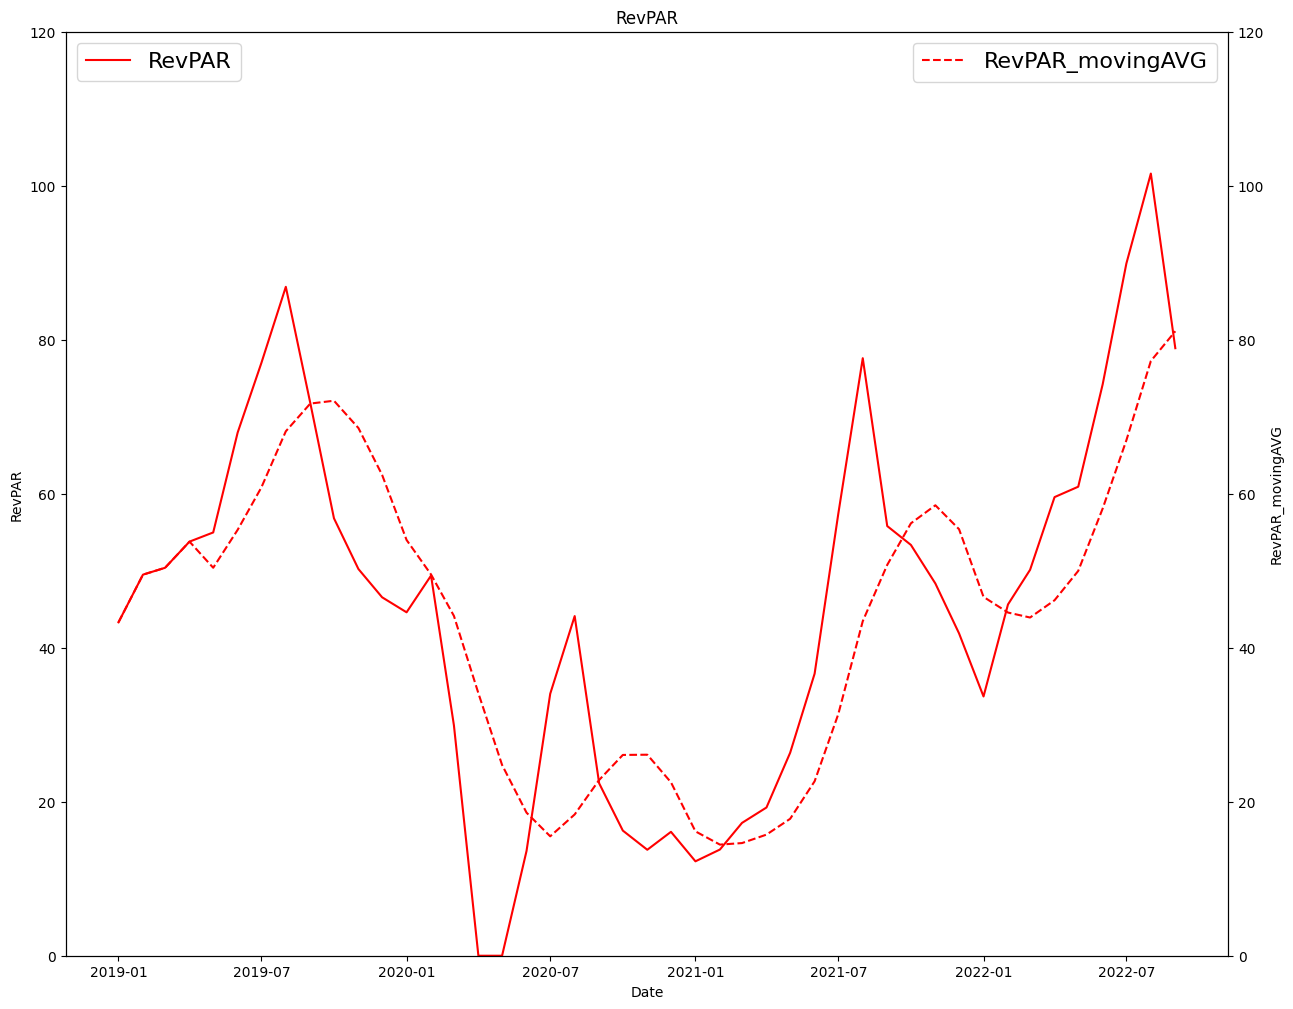

In [65]:
plt.figure(figsize=(15,12))
plt.title("RevPAR")
plt.ylim(0,120)

sns.lineplot(x=nacional["Date"], y=nacional["RevPAR"], color='r')
plt.legend(labels=["RevPAR"], loc="upper left")

ax2 = plt.twinx()
plt.ylim(0,120)

sns.lineplot(x=nacional["Date"], y=nacional["RevPAR_movingAVG"], color='r', linestyle='--', ax=ax2)
plt.legend(labels=["RevPAR_movingAVG"], loc="upper right")

Lo mismo se ve para el beneficio por habitación disponible.

## KPIs por zonas turísticas

## Andalucía

<AxesSubplot:title={'center':'Estancia media (Andalucía)'}, xlabel='Date', ylabel='AvgStay'>

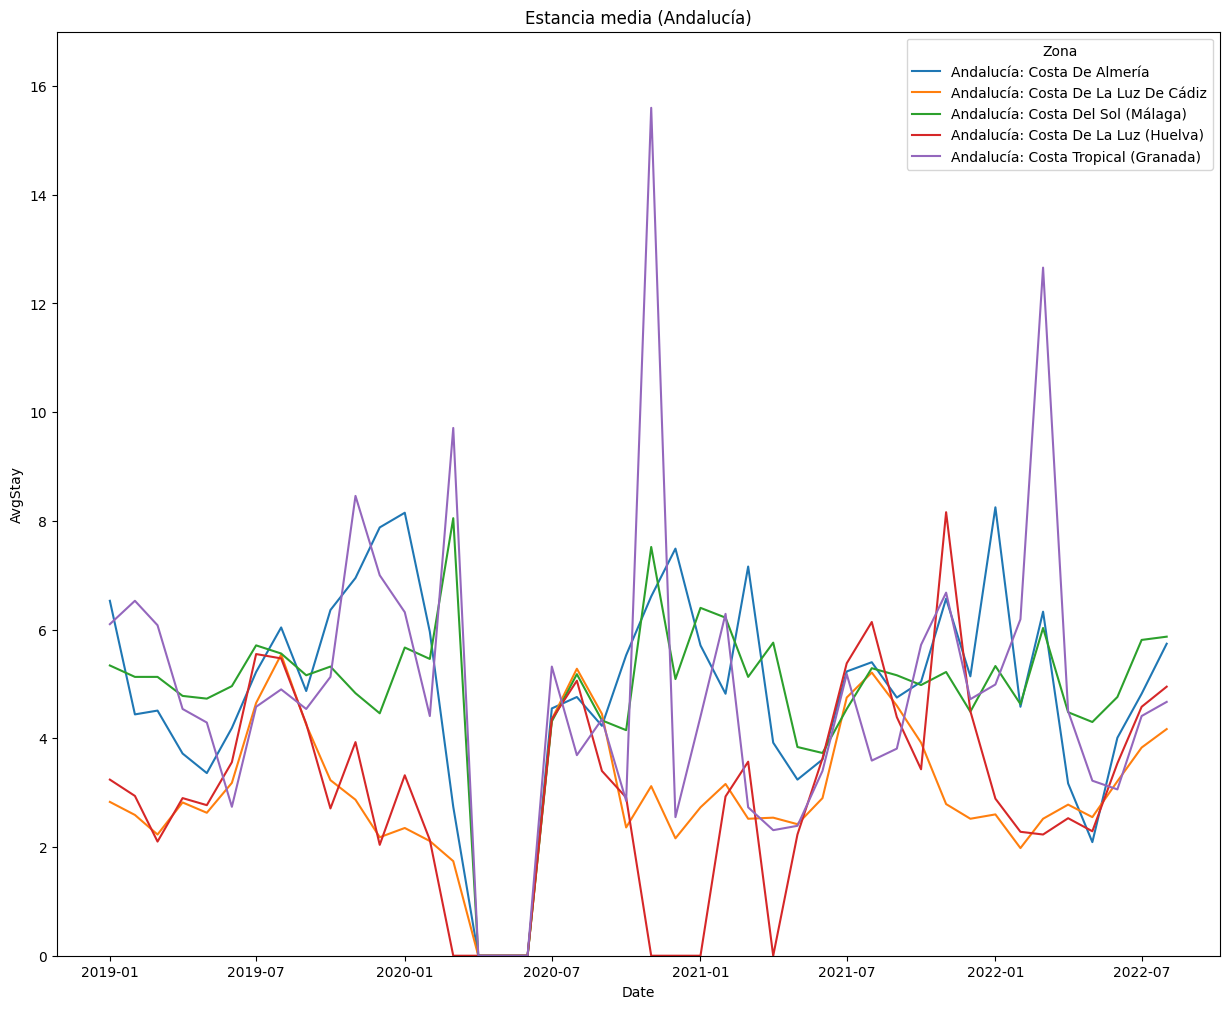

In [48]:
plt.figure(figsize=(15,12))
plt.title("Estancia media (Andalucía)")
plt.ylim(0,17)

zona_and = zonas[zonas['Zona'].str.startswith('Andaluc', na=False)]

sns.lineplot(x=zona_and['Date'], y=zona_and['AvgStay'], hue=zona_and['Zona'])

## Canarias

<AxesSubplot:title={'center':'Estancia media (Canarias)'}, xlabel='Date', ylabel='AvgStay'>

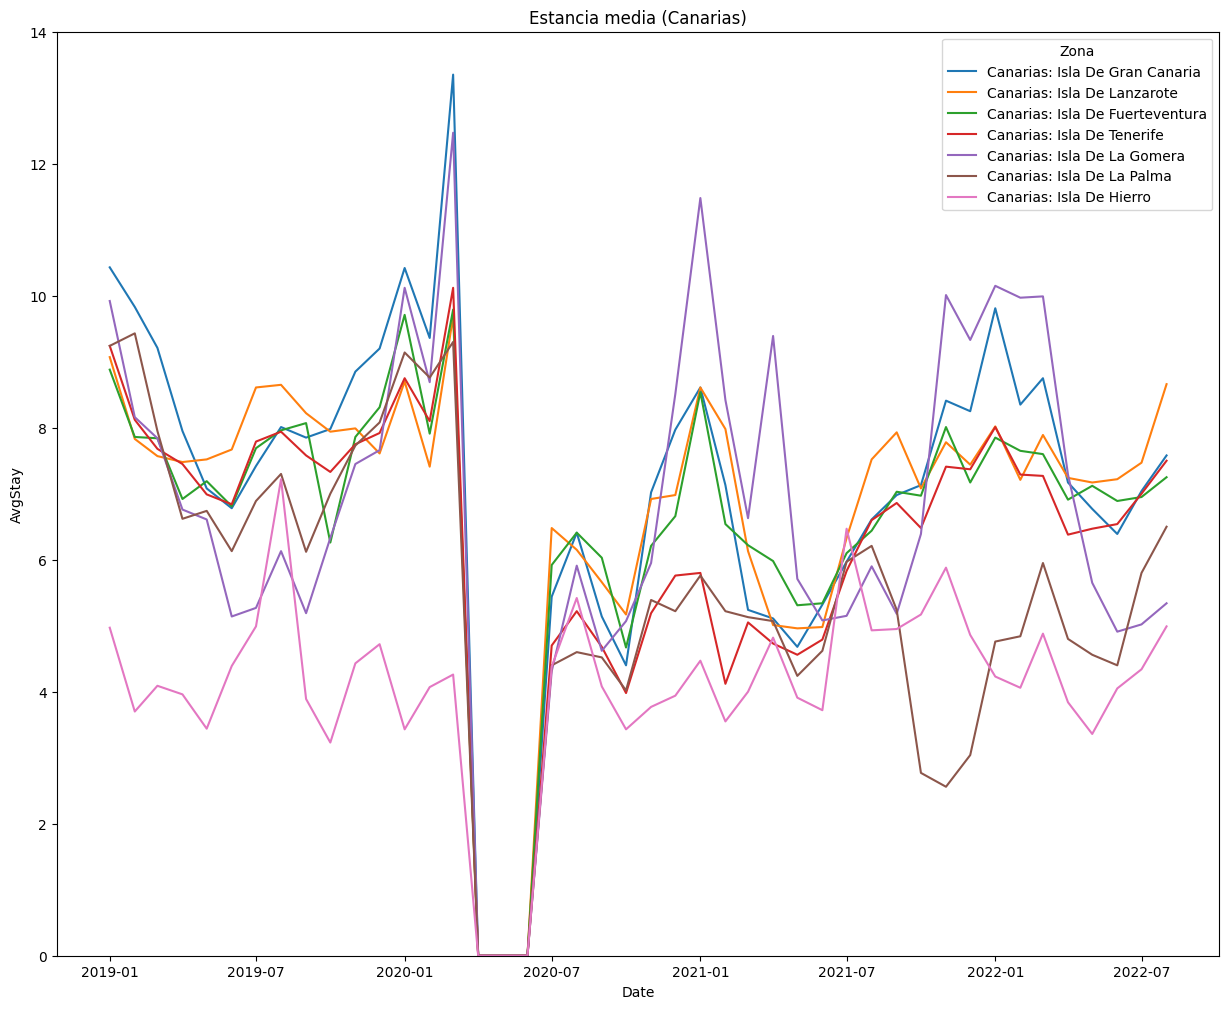

In [52]:
plt.figure(figsize=(15,12))
plt.title("Estancia media (Canarias)")
plt.ylim(0,14)

zona_can = zonas[zonas['Zona'].str.startswith('Canarias', na=False)]

sns.lineplot(x=zona_can['Date'], y=zona_can['AvgStay'], hue=zona_can['Zona'])

## Cataluña

<AxesSubplot:title={'center':'Estancia media (Cataluña)'}, xlabel='Date', ylabel='AvgStay'>

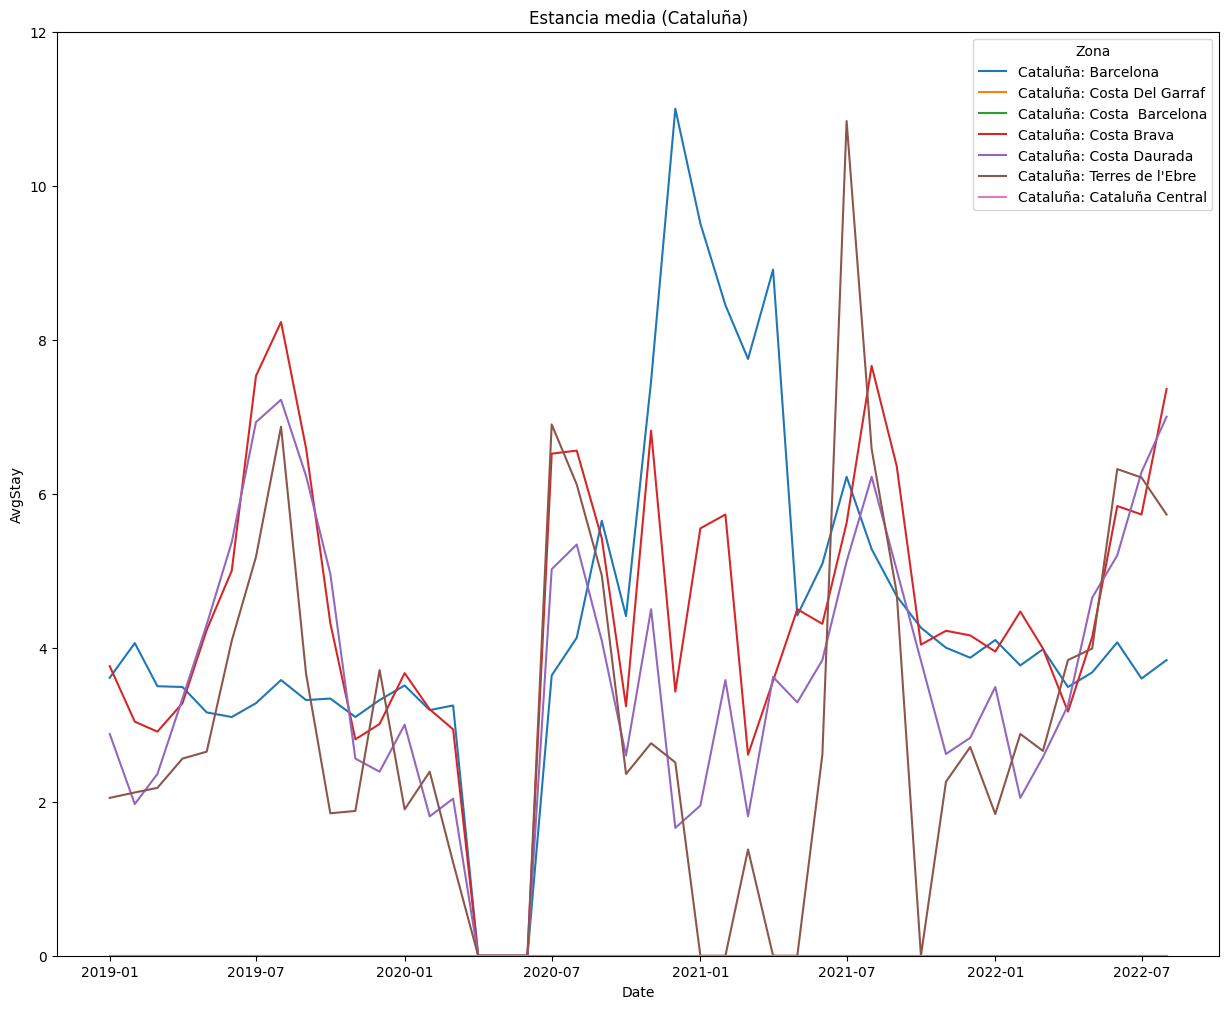

In [64]:
plt.figure(figsize=(15,12))
plt.title("Estancia media (Cataluña)")
plt.ylim(0,12)

zona_cat = zonas[zonas['Zona'].str.startswith('Catalu', na=False)]
zona_cat = zona_cat[zona_cat['Zona']!="Cataluña: Costa  Barcelona 2015"]
zona_cat = zona_cat[zona_cat['Zona']!="Cataluña: Costa  Barcelona 2016"]

sns.lineplot(x=zona_cat['Date'], y=zona_cat['AvgStay'], hue=zona_cat['Zona'])

Es díficl encontrar un patrón claro para las estancias medias en toda Cataluña. Sin embargo, se aprecian algunos casos interesantes:

En Barcelona, a principios de 2021 se alcanzó una duración de la estancia media muy superior (casi tres veces más) a las que existían en toda la serie histórica. Hay que destacar que Barcelona no es una zona turística donde tradicionalmente exista un alto componente estacional en cuanto a la ocupación turística.

<AxesSubplot:title={'center':'Estancia media (Barcelona)'}, xlabel='Date', ylabel='AvgStay'>

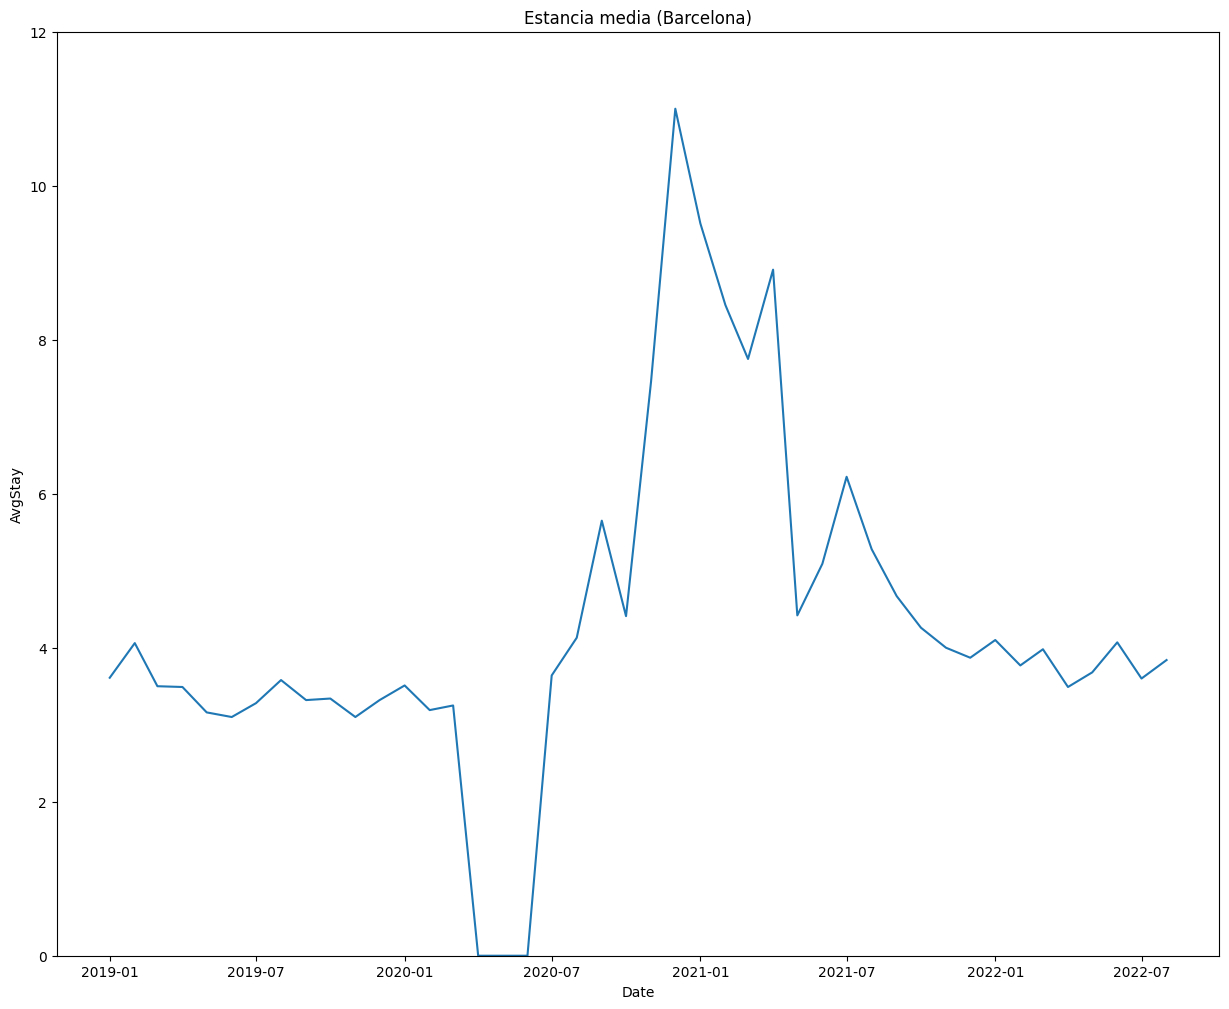

In [68]:
plt.figure(figsize=(15,12))
plt.title("Estancia media (Barcelona)")
plt.ylim(0,12)

sns.lineplot(x=zona_cat['Date'], y=zona_cat[zona_cat['Zona']=="Cataluña: Barcelona"]['AvgStay'])

En la zona de Terres de l'Ebre (con un fuerte componente estacional donde el turismo se suele concentrar en los meses de verano), hubo un boom en el primer verano post-covid, donde la duración media de las estancias fue muy superior a la que se registra en la serie histórica. Dicho valor de estancia media no se ha repetido en el verano siguiente.

<AxesSubplot:title={'center':"Estancia media (Terres de l'Ebre)"}, xlabel='Date', ylabel='AvgStay'>

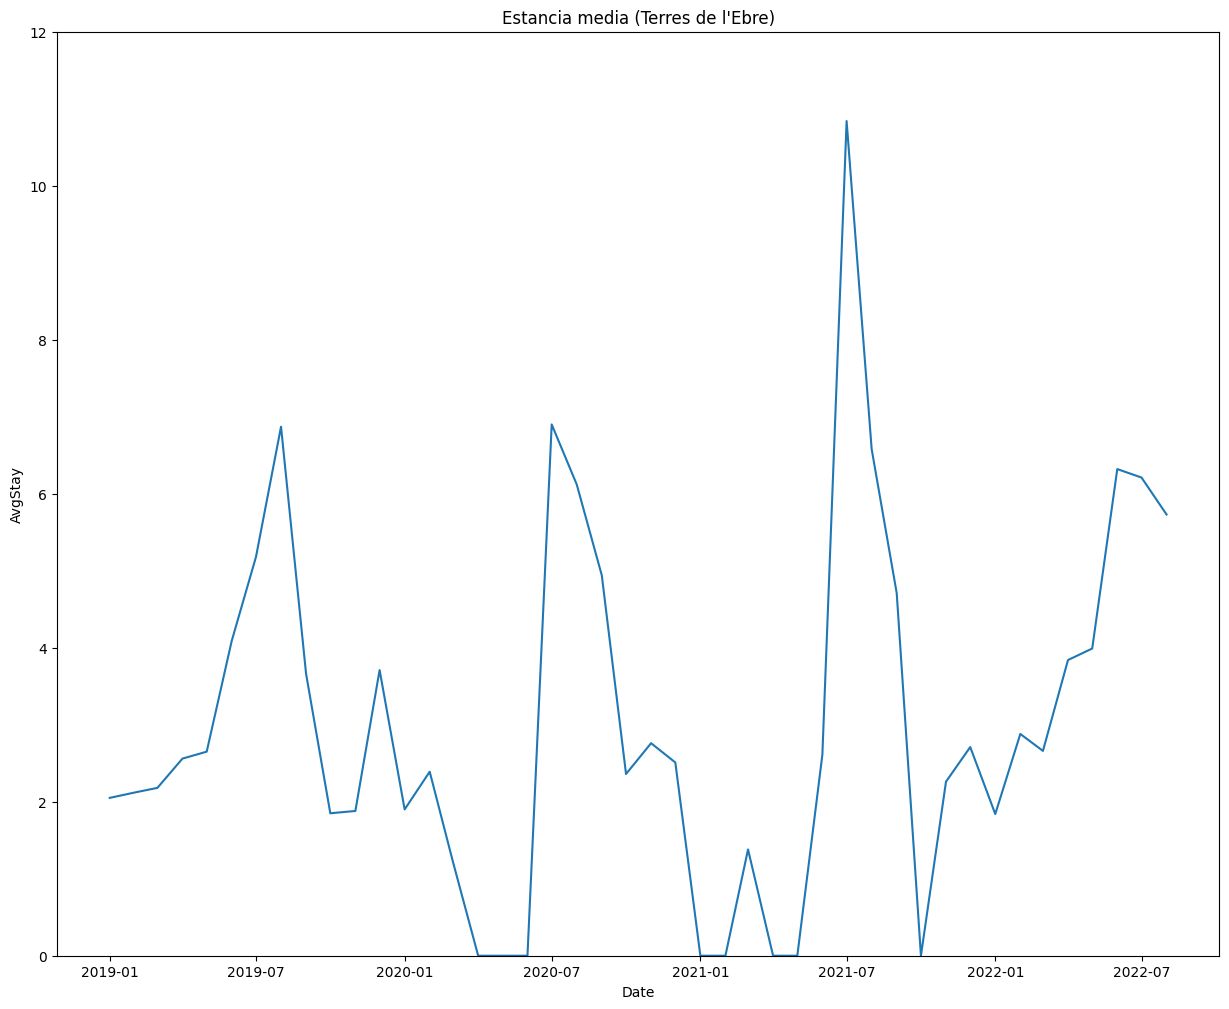

In [70]:
plt.figure(figsize=(15,12))
plt.title("Estancia media (Terres de l'Ebre)")
plt.ylim(0,12)

sns.lineplot(x=zona_cat['Date'], y=zona_cat[zona_cat['Zona']=="Cataluña: Terres de l'Ebre"]['AvgStay'])

## Andalucía

47243.0

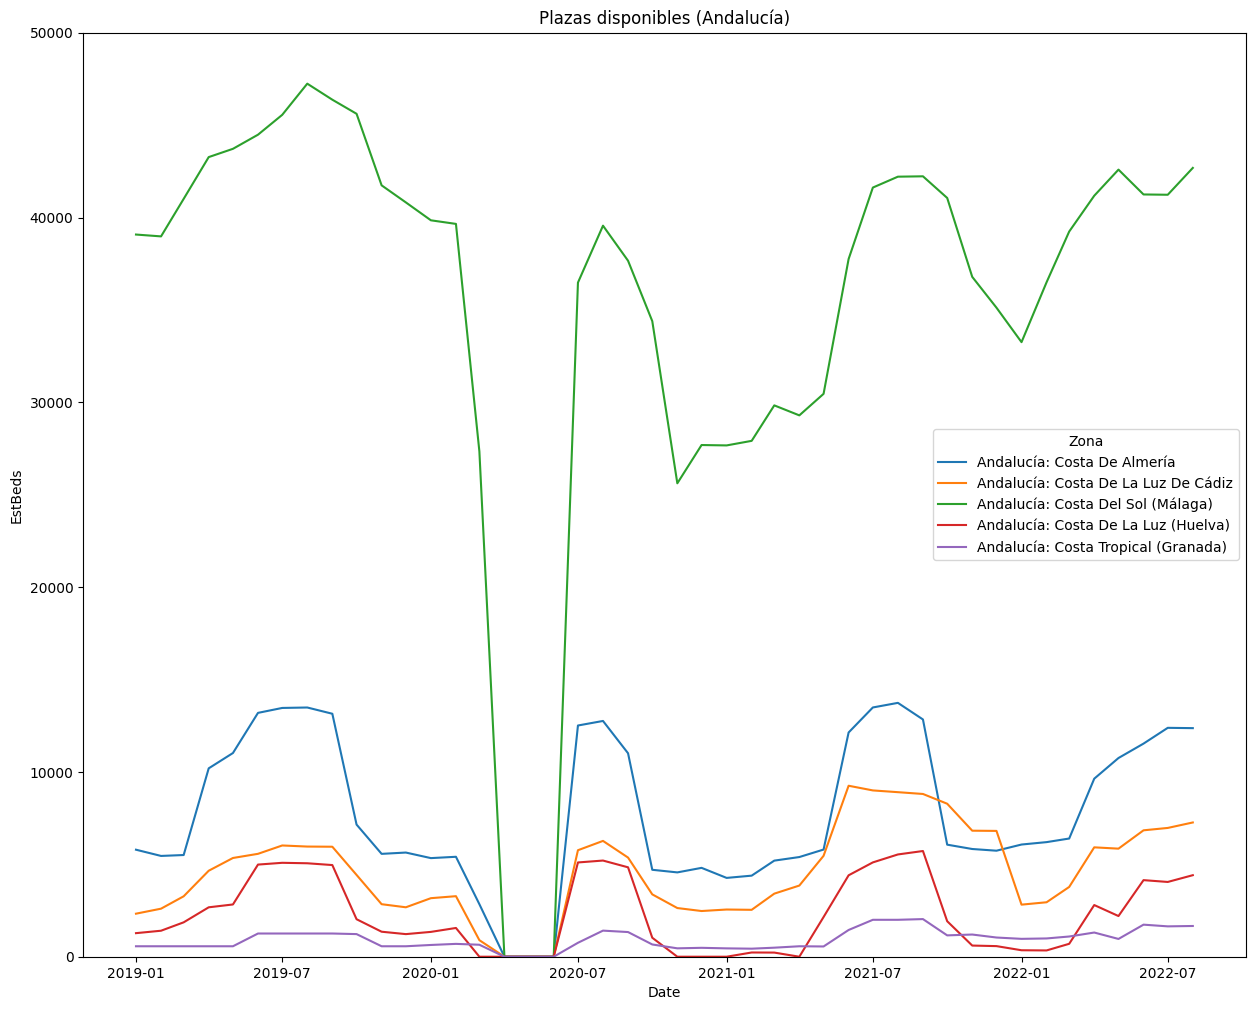

In [51]:
plt.figure(figsize=(15,12))
plt.title("Plazas disponibles (Andalucía)")
plt.ylim(0,50000)

sns.lineplot(x=zona_and['Date'], y=zona_and['EstBeds'], hue=zona_and['Zona'])
zona_and['EstBeds'].max()

## Canarias

<AxesSubplot:title={'center':'Plazas disponibles (Canarias)'}, xlabel='Date', ylabel='EstBeds'>

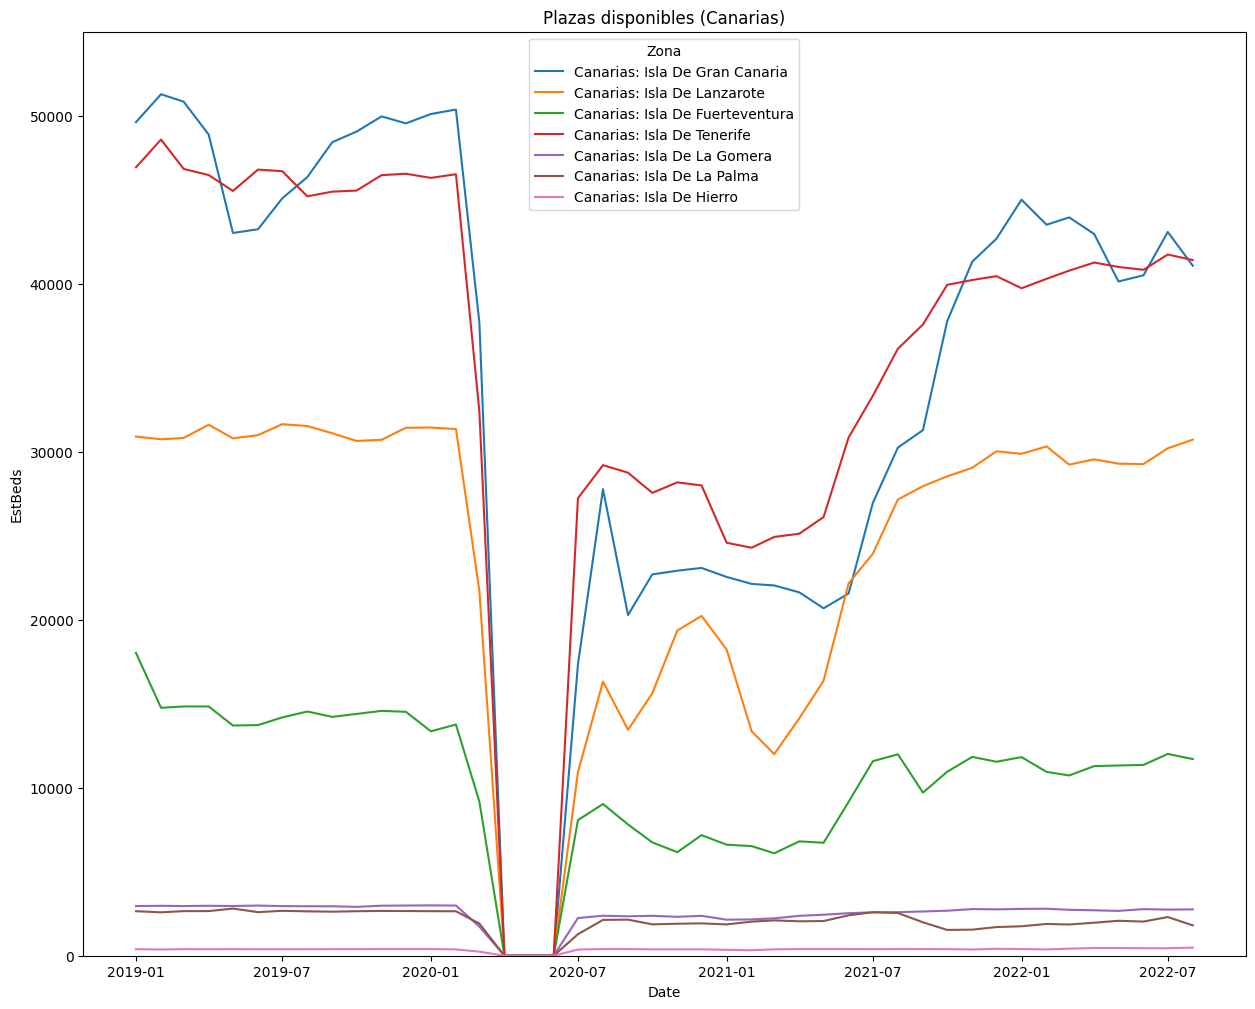

In [59]:
plt.figure(figsize=(15,12))
plt.title("Plazas disponibles (Canarias)")
plt.ylim(0,55000)

sns.lineplot(x=zona_can['Date'], y=zona_can['EstBeds'], hue=zona_can['Zona'])

### Media móvil Isla de Gran Canaria

In [69]:
gc = zonas[zonas['Zona'] == "Canarias: Isla De Gran Canaria"]
gc = gc.sort_values(by='Date', ascending=True)
gc = gc.reset_index(drop=True)

gc['EstBeds_movingAVG'] = gc['EstBeds'].rolling(5).mean()
gc['EstBeds_movingAVG'].fillna(value=gc['EstBeds'], inplace=True)

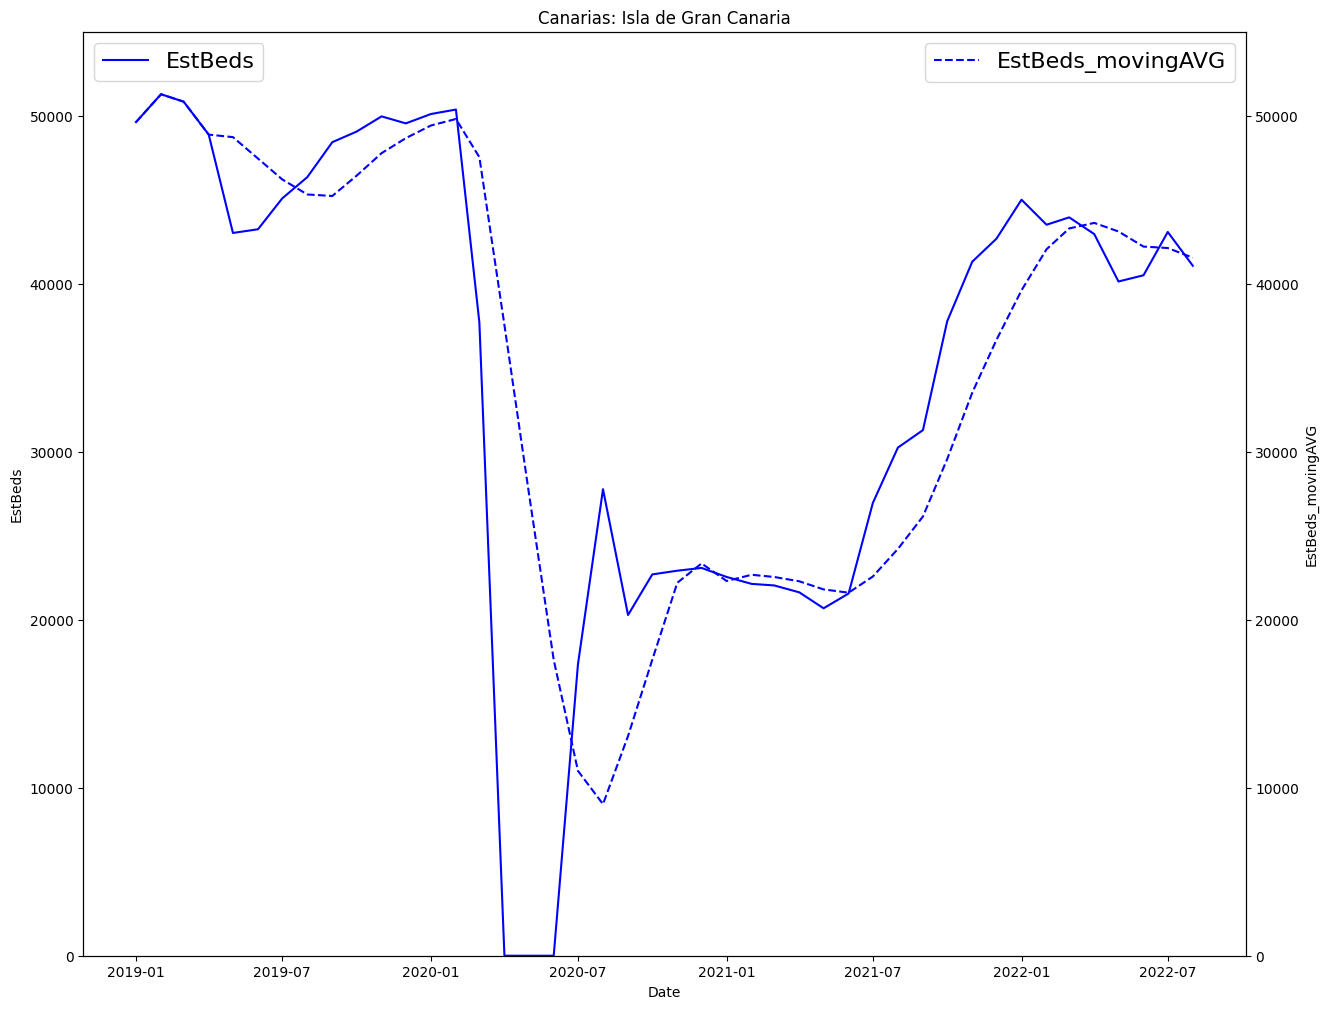

In [70]:
plt.figure(figsize=(15,12))
plt.title("Canarias: Isla de Gran Canaria")
plt.ylim(0,55000)

sns.lineplot(x=gc["Date"], y=gc["EstBeds"], color='b')
plt.legend(labels=["EstBeds"], loc="upper left")

ax2 = plt.twinx()
plt.ylim(0,55000)
sns.lineplot(x=gc["Date"], y=gc["EstBeds_movingAVG"], color='b', linestyle='--', ax=ax2)
plt.legend(labels=["EstBeds_movingAVG"], loc="upper right")

### Media móvil Isla de Tenerife

In [71]:
tenerife = zonas[zonas['Zona'] == "Canarias: Isla De Tenerife"]
tenerife = tenerife.sort_values(by='Date', ascending=True)
tenerife = tenerife.reset_index(drop=True)

tenerife['EstBeds_movingAVG'] = tenerife['EstBeds'].rolling(5).mean()
tenerife['EstBeds_movingAVG'].fillna(value=tenerife['EstBeds'], inplace=True)

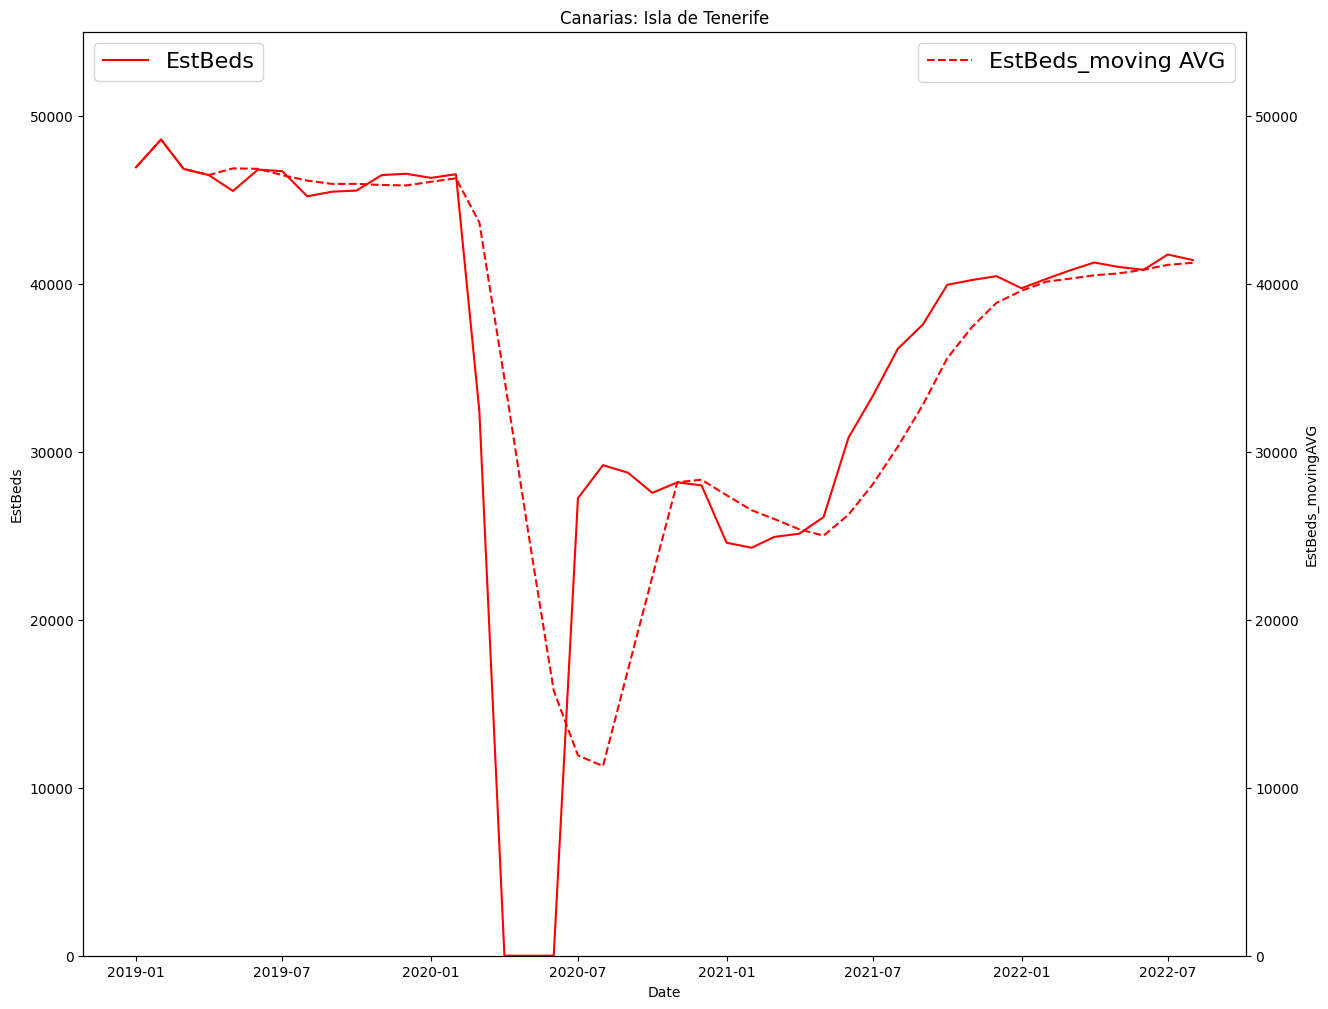

In [72]:
plt.figure(figsize=(15,12))
plt.title("Canarias: Isla de Tenerife")
plt.ylim(0,55000)

sns.lineplot(x=tenerife["Date"], y=tenerife["EstBeds"], color='r')
plt.legend(labels=["EstBeds"], loc="upper left")

ax2 = plt.twinx()
plt.ylim(0,55000)
sns.lineplot(x=tenerife["Date"], y=tenerife["EstBeds_movingAVG"], color='r', linestyle='--', ax=ax2)
plt.legend(labels=["EstBeds_moving AVG"], loc="upper right")

<AxesSubplot:title={'center':'Plazas disponibles (Cataluña)'}, xlabel='Date', ylabel='EstBeds'>

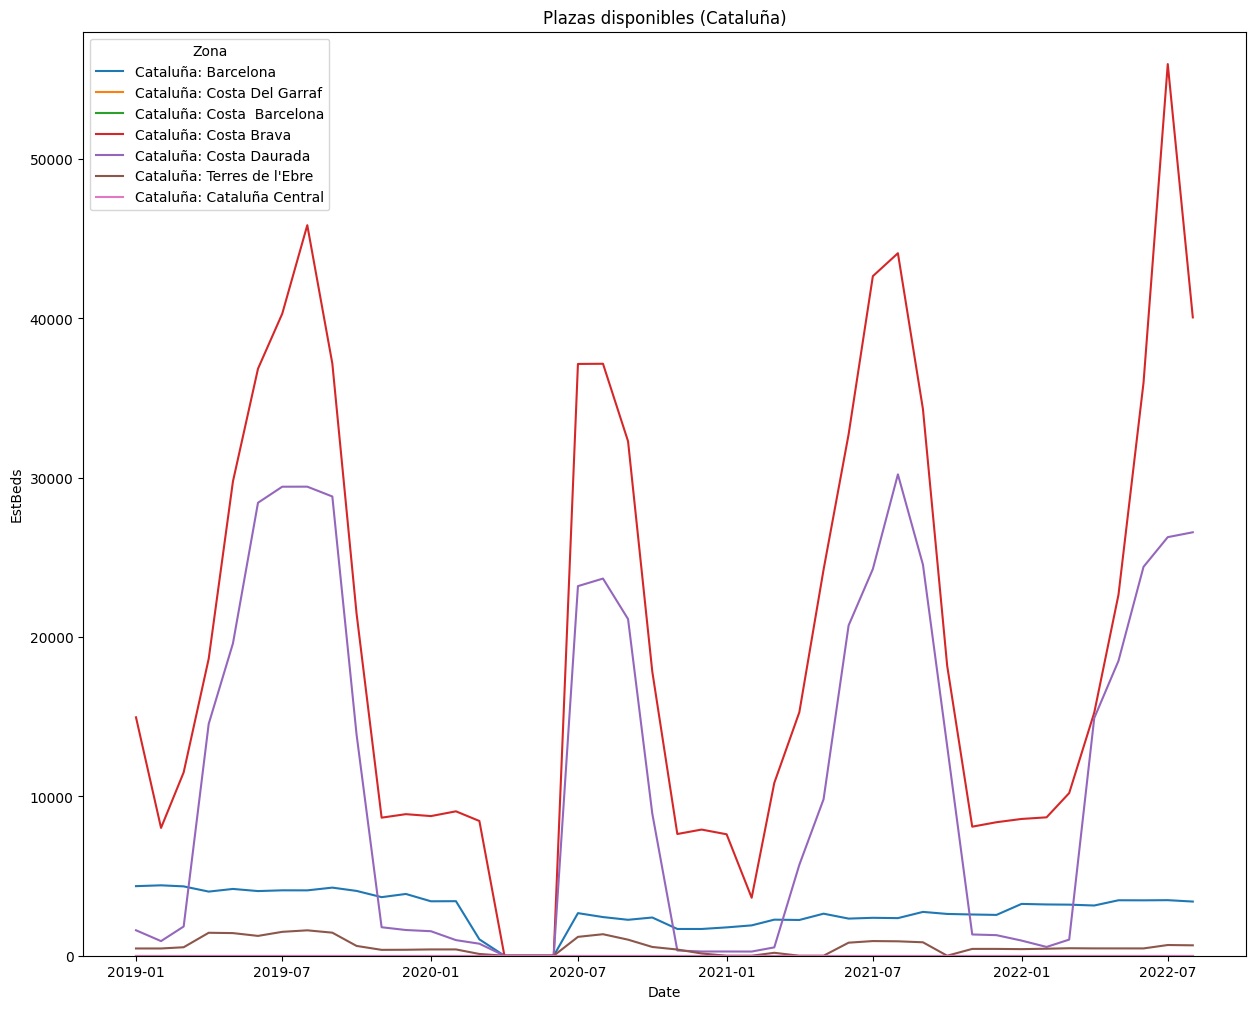

In [61]:
plt.figure(figsize=(15,12))
plt.title("Plazas disponibles (Cataluña)")
plt.ylim(0,58000)

sns.lineplot(x=zona_cat['Date'], y=zona_cat['EstBeds'], hue=zona_cat['Zona'])

Las plazas disponibles se han recuperado a los niveles pre-covid en Andalucía y Cataluña, pero se observa que en Canarias aún no hay tantas plazas disponibles como antes.